In [1]:
import pandas as pd
from pathlib import Path

In [5]:
import sys
sys.path.append("..")

In [6]:
from GLC.data_loading.common import load_patch

In [15]:
from matplotlib.pyplot import imshow

In [71]:
import numpy as np

In [7]:
DATA_PATH = Path("../data/geolifeclef-2022-lifeclef-2022-fgvc9/")

In [8]:
DATA_PATH

PosixPath('../data/geolifeclef-2022-lifeclef-2022-fgvc9')

In [9]:
df_obs_fr = pd.read_csv(DATA_PATH / "observations" / "observations_fr_train.csv", sep=";")
df_obs_us = pd.read_csv(DATA_PATH / "observations" / "observations_us_train.csv", sep=";")

df_obs = pd.concat((df_obs_fr, df_obs_us))
df_obs

,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train
...,...,...,...,...,...
956226,22068171,29.602327,-94.555860,5041,train
956227,22068172,38.029580,-122.883995,8688,train
956228,22068173,37.913720,-121.948814,12154,train
956229,22068174,37.206974,-122.067154,5309,val


In [22]:
df_suggested_landcover_alignment = pd.read_csv(DATA_PATH / "metadata" / "landcover_suggested_alignment.csv", sep=";")

In [23]:
landcover_mapping = df_suggested_landcover_alignment["suggested_landcover_code"].values

In [32]:
patch1 = load_patch(10561949, DATA_PATH)

In [151]:
patch = load_patch(10561949, DATA_PATH,landcover_mapping=landcover_mapping, data='rgb')

In [155]:
imshow(patch[1])

IndexError: list index out of range

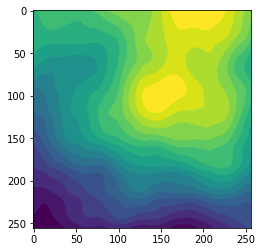

In [37]:
imshow(patch[2])

In [35]:
patch[3]

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ...,  4,  4,  4],
       [10, 10, 10, ...,  4,  4,  4],
       [10, 10, 10, ...,  4,  4,  4]])

In [36]:
patch1[3]

array([[15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       [15, 15, 15, ..., 15, 15, 15],
       ...,
       [15, 15, 15, ...,  8,  8,  8],
       [15, 15, 15, ...,  8,  8,  8],
       [15, 15, 15, ...,  8,  8,  8]], dtype=uint8)

In [55]:
for p in patch:
    print(p.shape)

(256, 256, 3)
(256, 256)
(256, 256)
(256, 256)


In [99]:
patch[0].transpose(2,0,1).shape

(3, 256, 256)

In [112]:
torch.tensor(patch[0]).permute(2,0,1).shape

torch.Size([3, 256, 256])

In [113]:
torch.tensor(patch[1]).unsqueeze(dim=0).shape

torch.Size([1, 256, 256])

In [118]:
tmp = torch.concat([torch.tensor(patch[0]).permute(2,0,1),
             torch.tensor(patch[1]).unsqueeze(dim=0),
             torch.tensor(patch[2]).unsqueeze(dim=0),
             torch.tensor(patch[3]).unsqueeze(dim=0)
             
             ],
            dim = 0
            )

In [101]:
tmp = np.concatenate([
                        patch[0].transpose(2,0,1),
                        np.expand_dims(patch[1], axis=0),
                        np.expand_dims(patch[2], axis=0),
                        np.expand_dims(patch[3], axis=0)],
            axis=0)

In [102]:
# np.concatenate([np.expand_dims(patch[1], axis=2),np.expand_dims(patch[2], axis=2), np.expand_dims(patch[3], axis=2)],axis=2)

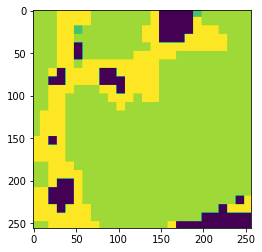

In [103]:
imshow(patch[3])

In [169]:
import torch
import torch.nn as nn
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
# model.conv1 = nn.Conv2d(6, 64, kernel_size=7, stride=2, padding=3,bias=False)

Using cache found in /home/rohit/.cache/torch/hub/pytorch_vision_v0.10.0


In [186]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [171]:
model.fc.in_features

512

In [172]:
tmp.dtype

torch.int64

In [173]:
# model(tmp.float().unsqueeze(dim=0))#.shape

In [174]:
from GLC.data_loading.pytorch_dataset import GeoLifeCLEF2022Dataset

In [175]:
from torch.utils.data import DataLoader

In [176]:
glf_dataset = GeoLifeCLEF2022Dataset(root = DATA_PATH, use_rasters=False, subset = 'train')

In [177]:
dl = DataLoader(dataset=glf_dataset,batch_size = 2)

In [178]:
data = next(enumerate(dl))[1]

In [184]:
data[0][0].permute(0,3,1,2)[:1].shape

torch.Size([1, 3, 256, 256])

In [185]:
model(data[0][0].permute(0,3,1,2)[:1])

RuntimeError: expected scalar type Byte but found Float